In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [16]:
# 파일 불러오기
with open('../../data/ba_chatgpt_df.pkl', 'rb') as f:
    df = pickle.load(f)


In [17]:
df_for_tot = df.groupby(['qna_creation_date']).sum()[['cnt']]

In [18]:
df_for_tot.head()

,cnt
qna_creation_date,
2013-11-30,9432
2013-12-01,9019
2013-12-02,16923
2013-12-03,18785
2013-12-04,19329


In [19]:
df_for_tot.loc['2022-11-30', :]

cnt    9517
Name: 2022-11-30, dtype: int64

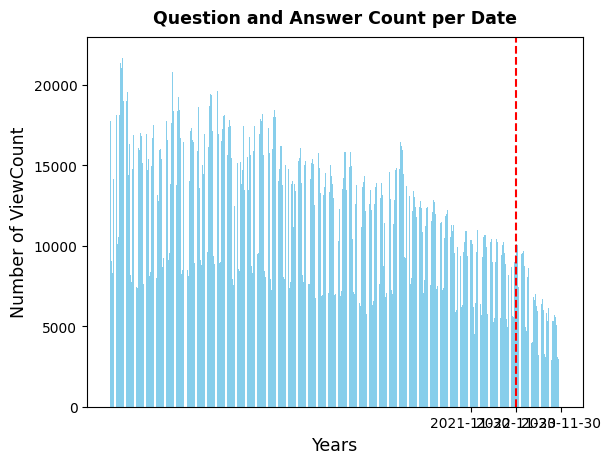

In [20]:
fig, ax = plt.subplots()

ax.bar(df_for_tot.index
    ,  height = df_for_tot['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Years", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Number of ViewCount", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

plt.show();

In [33]:
df_for_tot[df_for_tot.index>='2020-11-30']

,cnt
qna_creation_date,
2020-11-30,11225
2020-12-01,12120
2020-12-02,12314
2020-12-03,12806
2020-12-04,11651
...,...
2023-11-25,3223
2023-11-26,3333
2023-11-27,5802


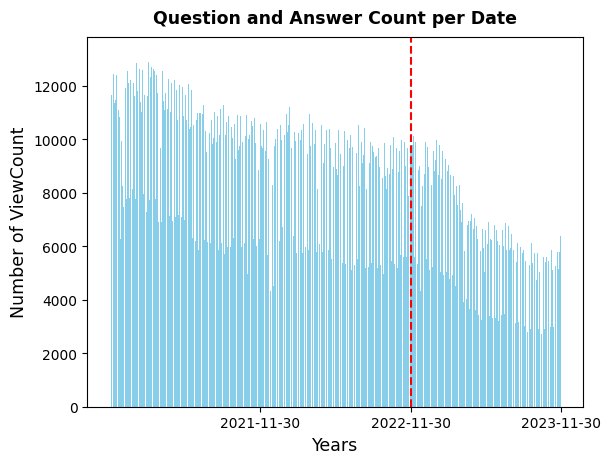

In [34]:
fig, ax = plt.subplots()

ax.bar(df_for_tot[df_for_tot.index>='2020-11-30'].index
    ,  height = df_for_tot[df_for_tot.index>='2020-11-30']['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Years", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Number of ViewCount", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

plt.show();

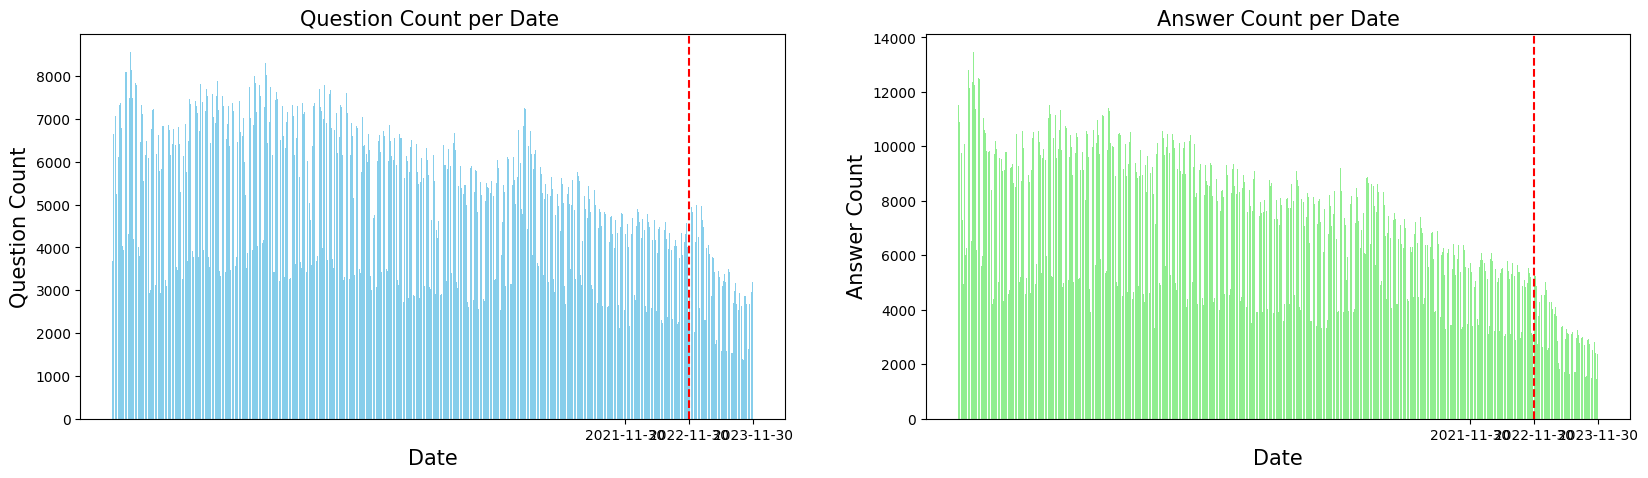

In [22]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
major_xticks = ['2021-11-30', '2022-11-30', '2023-11-30']

axs[0].bar(df.loc[df['posttypeid']=='1', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='1', 'cnt']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs[0].set_title('Question Count per Date ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Question Count', fontsize = 15)
axs[0].set_xticks(major_xticks)

axs[0].axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)


axs[1].bar(df.loc[df['posttypeid']=='2', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='2', 'cnt']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].set_title('Answer Count per Date', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Answer Count', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)


plt.show();

In [23]:
df_for_tot_rset = df_for_tot.reset_index()

In [24]:
df_for_tot_rset['weekday_nm'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.day_name()
df_for_tot_rset['weekday'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.weekday

In [25]:
df_for_tot_rset

,qna_creation_date,cnt,weekday_nm,weekday
0,2013-11-30,9432,Saturday,5
1,2013-12-01,9019,Sunday,6
2,2013-12-02,16923,Monday,0
3,2013-12-03,18785,Tuesday,1
4,2013-12-04,19329,Wednesday,2
...,...,...,...,...
3647,2023-11-25,3223,Saturday,5
3648,2023-11-26,3333,Sunday,6
3649,2023-11-27,5802,Monday,0
3650,2023-11-28,6225,Tuesday,1


In [26]:
df_weekday_mean = df_for_tot_rset.groupby(['weekday_nm', 'weekday']).mean([['cnt']]).reset_index()

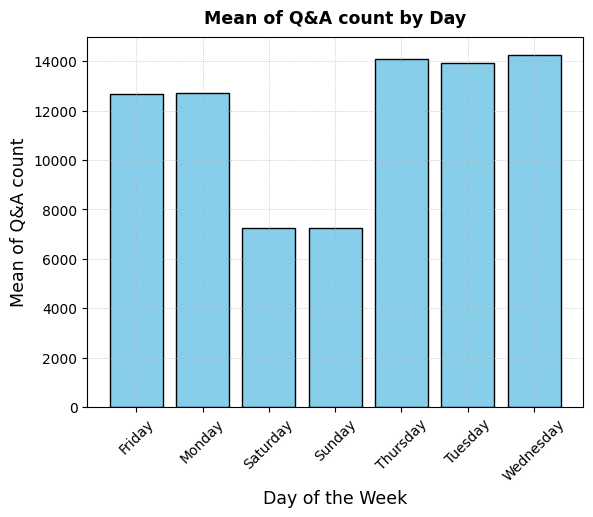

In [27]:
fig, ax = plt.subplots()

ax.bar(df_weekday_mean.weekday_nm
    ,  height = df_weekday_mean['cnt']
    ,  color = 'skyblue'
    ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Mean of Q&A count by Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Day of the Week", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Mean of Q&A count", # add y-axis label
              fontsize = 12.5)

label_list = list(df_weekday_mean['weekday_nm'])
tick_values = np.arange(len(label_list))
ax.set_xticks(ticks = tick_values ,labels = label_list, rotation =45)


# fig.text(0.7, 0.76, color = 'red', fontsize = 12.5,  s='Mean: ' + str(round(np.mean(viewcount_df['ViewCount_question']), 2))) #
# fig.text(0.41, 0.77, s='pct_change: ' + str(decrease_2122)) #
# fig.text(0.66, 0.65, s='pct_change: ' + str(decrease_2223)) #

ax.grid(True, linestyle = ':', linewidth = 0.5) # add grid

plt.show();